In [6]:
import matplotlib.pyplot as plt
import pickle
from skimage.transform import rotate
from scipy import ndimage
from skimage.util import img_as_ubyte
from joblib import Parallel, delayed
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.ensemble.forest import _generate_sample_indices
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import product
import seaborn as sns

#import sys
#sys.path.append("../lifelong_learner")
#from lf import LF

%matplotlib inline

In [7]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [8]:
task = range(0,10,1)
ntrees = range(10,300,10)

ntask = len(task)
n_ntrees = len(ntrees)

err = np.zeros((ntask,n_ntrees),dtype=float)

for t in task:
    for count,tree in enumerate(ntrees):
        filename = '../result/task_minibatch'+str(t)+'__'+str(tree)
        err[t-1,count] = 1 - unpickle(filename)

In [9]:
err

array([[0.25918333, 0.28293333, 0.29316667, 0.29918333, 0.30313333,
        0.30498333, 0.30796667, 0.30765   , 0.31115   , 0.31131667,
        0.31466667, 0.31488333, 0.31463333, 0.31328333, 0.31378333,
        0.31561667, 0.31658333, 0.3174    , 0.31865   , 0.31763333,
        0.31796667, 0.31766667, 0.31726667, 0.31795   , 0.31783333,
        0.31865   , 0.3169    , 0.31845   , 0.31828333],
       [0.33918333, 0.36603333, 0.38003333, 0.38735   , 0.39228333,
        0.39406667, 0.39478333, 0.39765   , 0.39988333, 0.40068333,
        0.40243333, 0.4022    , 0.40273333, 0.40285   , 0.4052    ,
        0.4055    , 0.4042    , 0.40446667, 0.40565   , 0.40641667,
        0.40595   , 0.40528333, 0.40626667, 0.40721667, 0.40616667,
        0.40641667, 0.40765   , 0.40678333, 0.40801667],
       [0.3086    , 0.33903333, 0.35266667, 0.36156667, 0.36946667,
        0.37213333, 0.37541667, 0.37656667, 0.37758333, 0.37943333,
        0.38273333, 0.38366667, 0.38641667, 0.38533333, 0.38566667,
  

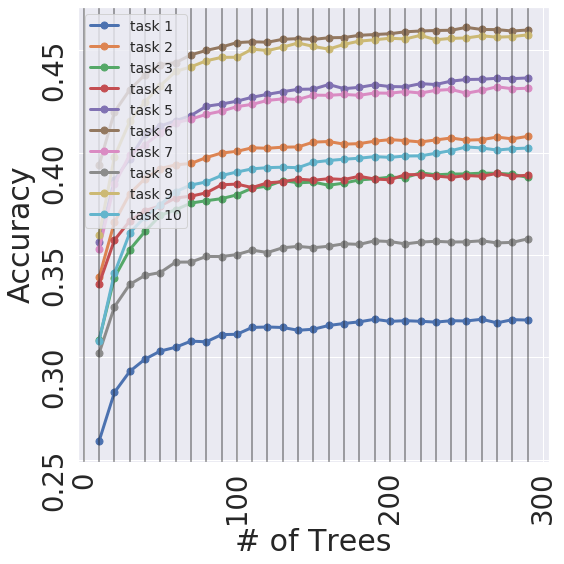

In [10]:
sns.set()

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(10):
    ax.plot(ntrees, err[i,:], marker='.', label = 'task '+str(i+1), markersize=14, linewidth=3)

#ax.set_xticks([100,1000,2000,3000,4000,5000])
#ax.set_yticks([0.9, 1.0, 1.1, 1.2])
#ax.set_ylim(0.89, 1.21)
ax.tick_params(labelsize=27.5,rotation=90)
ax.legend(loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('# of Trees', fontsize=30)

#ax.grid(axis='x')

for i in range(0,300,10):
    ax.axvline(x = i, linewidth=1.5,alpha=0.5, color='k')

#ax.axvline(x = 3500, linewidth=3, color='k')

#ax.hlines(0.422, 1,5000, colors='k', linestyles='dashed',linewidth=2)

plt.tight_layout()


plt.savefig('/data/Jayanta/tasks.png',dpi=500)